## ML introduction with sklearn（基于sklearn的机器学习介绍）

## Loading an example dataset（加载一些自带的数据集）

In [10]:
from sklearn import datasets

In [11]:
iris = datasets.load_iris()
# 数据存在data属性下
print(iris.data[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [12]:
# 期望的结果存在.target属性下
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
# 有些数据有形状
digits = datasets.load_digits()
digits.images[0] 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## 学习预测案例

In [21]:
from sklearn import svm
import matplotlib.pyplot as plt

In [22]:
clf = svm.SVC(gamma=0.001, C=100.)

In [23]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
clf.predict(digits.data[-1:])

array([8])

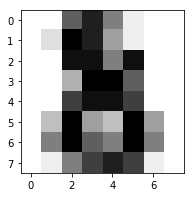

In [25]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## 存储自定义数据集

1.pickle用于练习，不能适应大数据，并且存在一定风险

In [26]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

2.joblib可用于大数据情况(这个包需要另外装)

In [28]:
from joblib import dump, load

In [29]:
dump(clf, 'clfdemo.joblib')

['clfdemo.joblib']

In [30]:
clf3 = load('clfdemo.joblib')
clf3.predict(X[0:1])

array([0])

## 一些常见的规定

没有特殊声明，输入时float64位

In [31]:
import numpy as np
from sklearn import random_projection

In [32]:
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [33]:
# 转numpy输入的数据格式
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

预测返回结果

In [34]:
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC(gamma='scale')
clf.fit(iris.data, iris.target)
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [35]:
clf.fit(iris.data, iris.target_names[iris.target]) 
list(clf.predict(iris.data[:3]))  

['setosa', 'setosa', 'setosa']

## 重复fit，跟新参数

In [36]:
import numpy as np
from sklearn.svm import SVC

In [37]:
rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

In [38]:
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [39]:
clf.set_params(kernel='rbf', gamma='scale').fit(X, y)  
clf.predict(X_test)

array([1, 0, 1, 1, 0])

## 多类多标签fit

In [40]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(gamma='scale',
                                            random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [41]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])